In [1]:
import tensorflow as tf

2023-12-17 01:17:07.205599: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-17 01:17:07.345415: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-17 01:17:07.345481: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-17 01:17:07.349828: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-17 01:17:07.369115: I tensorflow/core/platform/cpu_feature_guar

In [2]:
tf.constant(10)

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [10]:
changable_var = tf.Variable([10,7])
changable_var

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>

In [11]:
changable_var[0].assign(15)
changable_var

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([15,  7], dtype=int32)>

In [12]:
import torch
var = torch.Tensor([10,11])
var

tensor([10., 11.])

In [13]:
var[0] = 1
var

tensor([ 1., 11.])

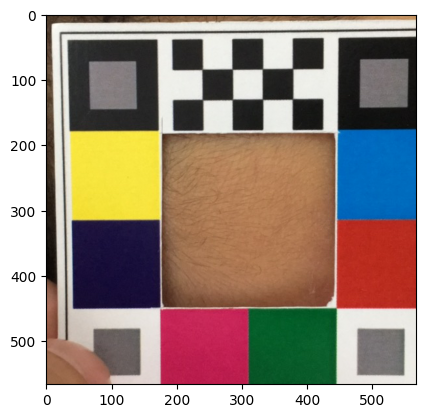

AttributeError: module 'torchvision.transforms' has no attribute 'crop'

In [7]:
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
plt.figure()
image = plt.imread("./NeoJaundice/images/0001-1.jpg")
plt.imshow(image)
plt.show()
tensor_image = torch.from_numpy(image)
new_image = transforms.crop(tensor_image,1,1,1,1)
plt.figure()
plt.imshow(new_image.numpy())
plt.show()

In [2]:
import polars as pl

dataframe = pl.read_csv("NeoJaundice/chd_jaundice_published_2.csv")
dataframe.head()

patient_id,image_idx,gender,gestational_age,age(day),weight,blood(mg/dL),Treatment
i64,str,str,i64,f64,i64,f64,i64
3,"""0003-1.jpg""","""F""",40,5.2,3280,3.9,0
3,"""0003-2.jpg""","""F""",40,5.2,3280,3.9,0
3,"""0003-3.jpg""","""F""",40,5.2,3280,3.9,0
35,"""0035-1.jpg""","""M""",39,8.7,3760,12.2,0
35,"""0035-2.jpg""","""M""",39,8.7,3760,12.2,0


In [3]:
import torch
import polars as pl
series = pl.Series({1,2,3,4,5})
tensor = torch.polar(series)
tensor

TypeError: Series constructor called with unsupported type 'set' for the `values` parameter

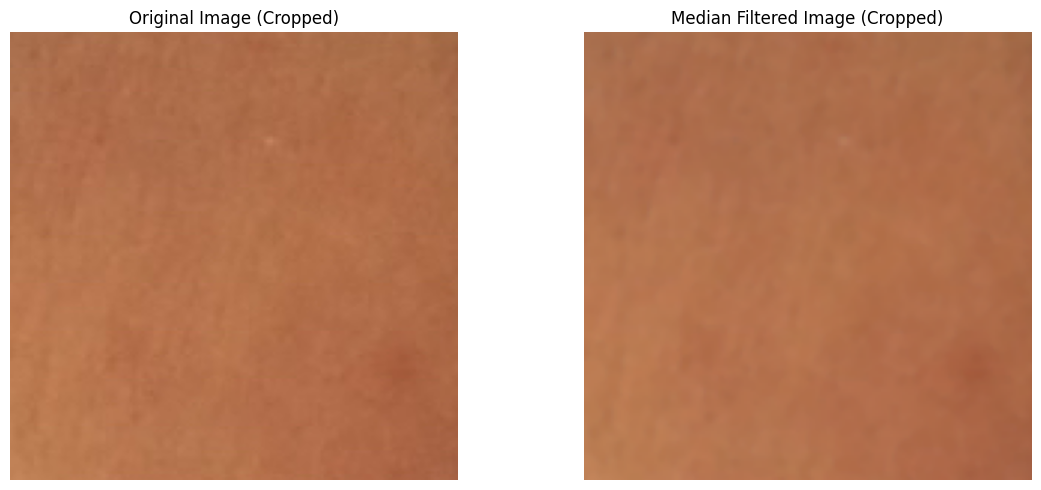

In [5]:
import matplotlib.pyplot as plt
from skimage import io, filters

# Load the image
image = io.imread('./NeoJaundice/images/0005-1.jpg')  # Replace 'image.jpg' with the actual image file name

# Apply median filter
median_filtered = filters.median(image)

# Center crop the images
def center_crop(img, crop_size):
    center_y, center_x = img.shape[0] // 2, img.shape[1] // 2
    half_crop = crop_size // 2
    cropped_img = img[
        center_y - half_crop:center_y + half_crop,
        center_x - half_crop:center_x + half_crop
    ]
    return cropped_img

crop_size = 150
image_cropped = center_crop(image, crop_size)
median_filtered_cropped = center_crop(median_filtered, crop_size)

# Display the original and median filtered images (center cropped) side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ax = axes.ravel()

ax[0].imshow(image_cropped, cmap=plt.cm.gray)
ax[0].set_title('Original Image (Cropped)')

ax[1].imshow(median_filtered_cropped, cmap=plt.cm.gray)
ax[1].set_title('Median Filtered Image (Cropped)')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


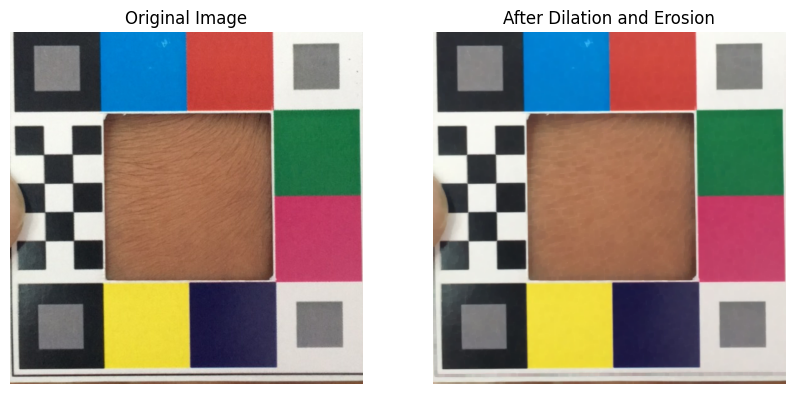

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread('./NeoJaundice/images/0011-2.jpg')

# Define the kernel size
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Apply dilation followed by erosion (opening)
dilation = cv2.dilate(image, kernel, iterations=1)
erosion = cv2.erode(dilation, kernel, iterations=1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB))
plt.title('After Dilation and Erosion')
plt.axis('off')

plt.show()
